# 1. 导入包

In [1]:
# -*- coding: utf-8 -*-
"""
Python 3.7.7
sklearn 0.23.1
使用DBSCAN对环形数据做聚类
"""

# 导入包
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# 2. 生成数据并可视化

In [2]:
# 生成数据
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

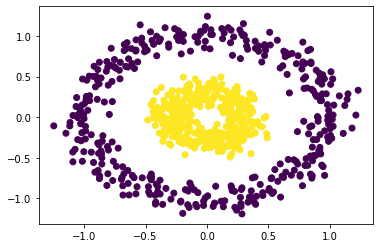

In [3]:
# 可视化数据
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)

# 3. 对自变量做特征缩放并可视化

In [4]:
# 对X做特征缩放
X = StandardScaler().fit_transform(X)

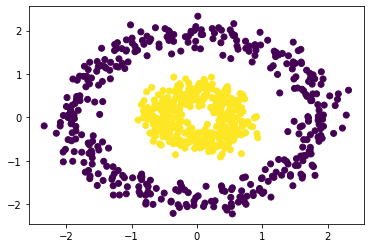

In [5]:
# 可视化数据
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)

# 4. 使用DBSCAN做聚类并可视化

In [6]:
# 使用DBSCAN做聚类
y_dbscan_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

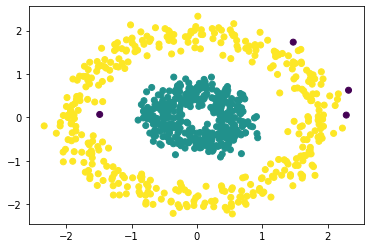

In [7]:
# 可视化DBSCAN聚类效果
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_dbscan_pred)

# 5. 使用K-Means做聚类并可视化

In [8]:
# 使用K-Means做聚类
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init=10, max_iter=300, random_state = 0)
kmeans.fit(X)
y_kmeans_pred = kmeans.predict(X)

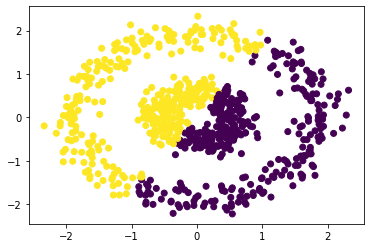

In [9]:
# 可视化K-means聚类效果
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_kmeans_pred)

# 6. 打印兰德指数

#### 由于样本数据有标签，所以可以用兰德指数衡量模型性能

In [10]:
# 打印出兰德指数
print("DBSCAN的兰德指数是：%0.3f" % metrics.adjusted_mutual_info_score(y, y_dbscan_pred))
print("K-Means的兰德指数是：%0.3f" % metrics.adjusted_mutual_info_score(y, y_kmeans_pred))

DBSCAN的兰德指数是：0.979
K-Means的兰德指数是：-0.001


#### 由打印出的兰德系数可见，DBSCAN算法的效果远远优于K-Means算法